In [1]:
from utils.config_loader import load_config
from processing.preprocessing import preprocess_data
from processing.normalize import normalize_data
from processing.labelizer import get_labels
from processing.train_splitter import split_data
from model.train import train_model
from model.inference import infer
from model.metrics import calculate_rmse
from visualization.plots import plot_heatmaps

config = load_config()

Login to wandb to track experiments

In [2]:
import wandb
WANDB_NOTEBOOK_NAME = "WindViVit"
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: samuelreyes. Use `wandb login --relogin` to force relogin


True

In [3]:
run = wandb.init(
    project="WindViVit",
    
    notes="First big experiment",
    tags=["7 years data"],
)

wandb.config = config #! Not working (check it out)

### Data preprocessing

In [2]:
preprocess_data(config)

In [2]:
normalize_data(config)

In [2]:
get_labels(config)

In [3]:
split_data(config)

### Training

In [4]:
train_model(config)

Epoch [1/25], Loss: 0.09482916444540024, Val Loss: 0.15590777914618548
Epoch [2/25], Loss: 0.07851715385913849, Val Loss: 0.10552252835021732
Epoch [3/25], Loss: 0.06022610142827034, Val Loss: 0.08346325454717352
Epoch [4/25], Loss: 0.050479110330343246, Val Loss: 0.07260525530733024
Epoch [5/25], Loss: 0.0558919757604599, Val Loss: 0.06594089488950192
Epoch [6/25], Loss: 0.04690365120768547, Val Loss: 0.06312666915594987
Epoch [7/25], Loss: 0.04619650915265083, Val Loss: 0.063676820511472
Epoch [8/25], Loss: 0.044818516820669174, Val Loss: 0.056476082123960436
Epoch [9/25], Loss: 0.05119297280907631, Val Loss: 0.05714974225739797
Epoch [10/25], Loss: 0.04214252158999443, Val Loss: 0.05444134113420238
Epoch [11/25], Loss: 0.043068449944257736, Val Loss: 0.05025920254457636
Epoch [12/25], Loss: 0.04384373128414154, Val Loss: 0.04646884981317694
Epoch [13/25], Loss: 0.03909303620457649, Val Loss: 0.04810059992564649
Epoch [14/25], Loss: 0.038613032549619675, Val Loss: 0.04330677285306198

### Evaluate model

In [5]:
results = infer(config)

In [6]:
rmse = calculate_rmse(results)

In [7]:
rmse

0.19466485

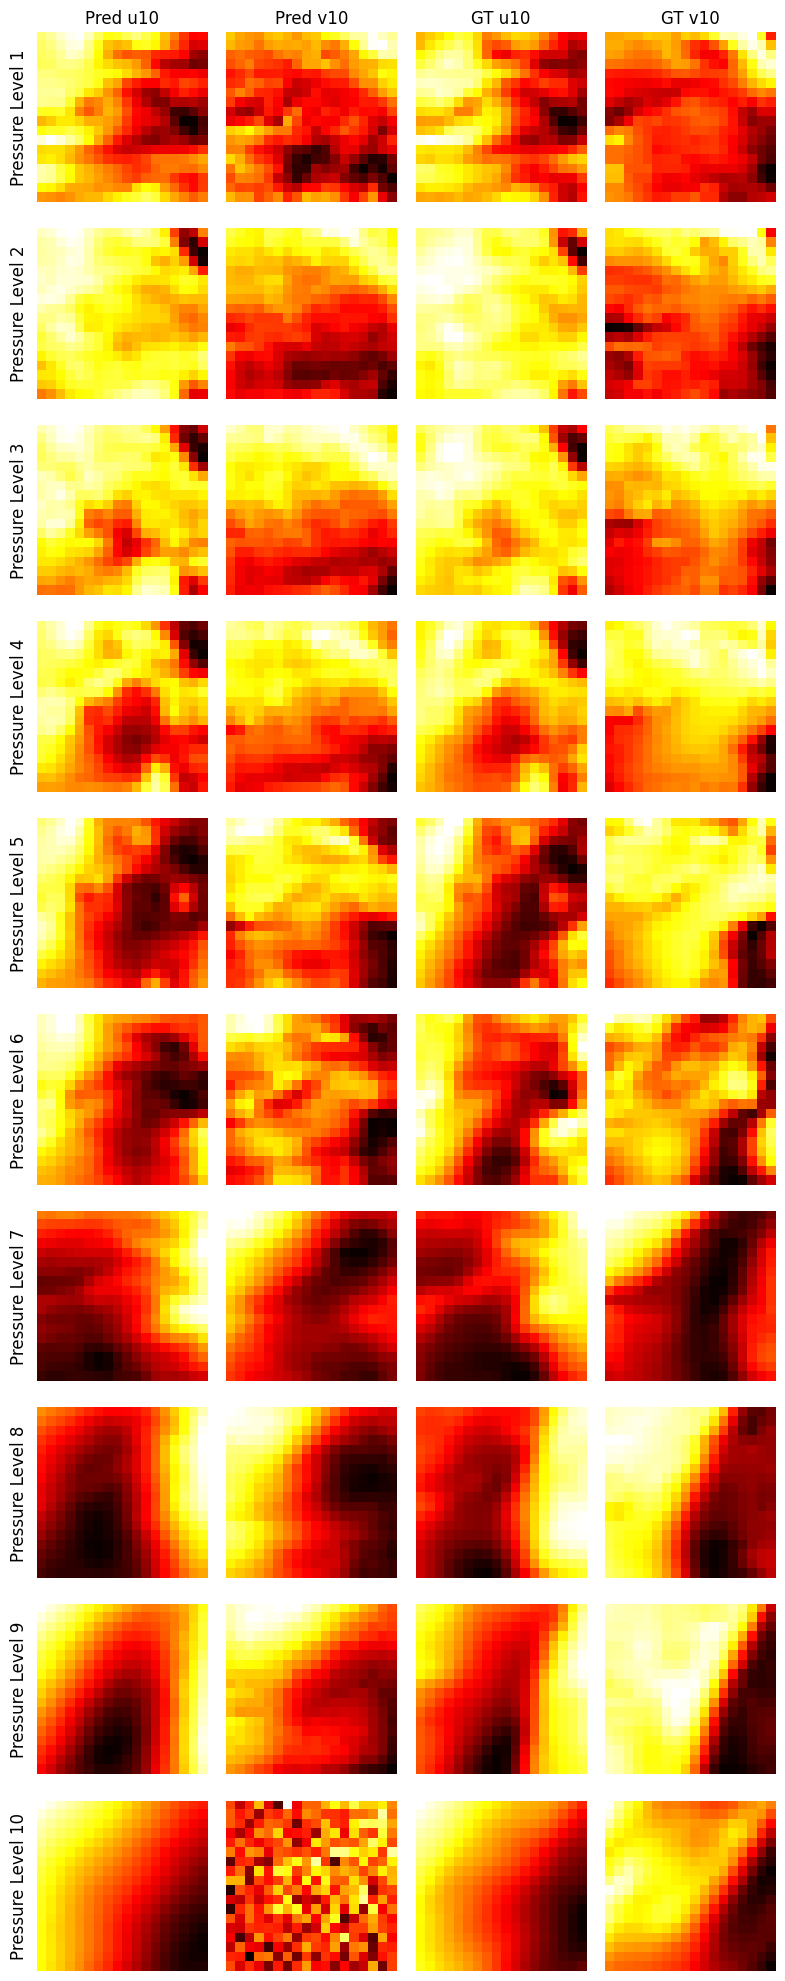

<Figure size 640x480 with 0 Axes>

In [14]:
plot_heatmaps(config, results, 1500, 5)